# Instructions

Instructions
1.	Comments and discussion of the results are essential; hence they should be included as required.
2.	This project comprises 15% of the overall marks for this course.
3.	Upon completion, you should email your submission directly to me,
mohfarah@kfupm.edu.sa. Also a copy should be submitted via the Blackboard.


In [1]:
#--------------------------
# import necessary libraries
#--------------------------

import pandas as pd              # For data pre-processing
import numpy as np               # For arrays and many useful things
import seaborn as sns            # For data visuliazation  
import matplotlib.pyplot as plt  # For data visuliazation

# Question1: Prices dataset

For this question, the data are contained in the file Prices.txt, available on Blackboard. The data consist of the daily share prices of one of the popular companies in KSA, in dollars($). The data was obtained by a data scientist for purely research purposes. The sample size is 520.

a.	Assuming the data scientist told you that the first 300 rows are based on 2019 share prices, and the next 220 rows are prices from 2020. Incorporate this piece of information into a second column in your data frame, called Price$year.
<br><br>
b.	Draw two box plots; one for the price distribution in 2019 and another for the price distribution in 2020. Comment on the main features of the plots. Do you think that the distributions are symmetric? I strongly suggest that you put the two box plots on the same axes to facilitate comparison.
<br><br>

c.	Put the 2019 price values into a variable called Prices2019.
<br><br>
d.	Use the fitted model to estimate the probability that a randomly selected share price in 2019 is between 40 and 70. (assume Normal)


In [2]:
#--------------------------
# import dataset
#--------------------------

df = pd.read_csv("prices.txt", sep = "\\t", header = 0)
df

C:\Users\AmmarYasser\AppData\Local\Temp\ipykernel_15292\2547090803.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("prices.txt", sep = "\\t", header = 0)


,Prices
0,65.77
1,65.50
2,65.45
3,65.36
4,65.07
...,...
515,42.13
516,41.75
517,41.43
518,42.45


In [3]:
#--------------------------
# Create a column for the Year, to be ddded into the datafrme
#--------------------------

Year = []

for i in range(0,300):  # [0,300) to add 2019 300 times 
    Year.append(2019)
for i in range(0,220):
    Year.append(2020)

In [4]:
#--------------------------
# Add the column to the dataframe
#--------------------------

df.insert(loc=1, column = "Year", value= Year )
df

,Prices,Year
0,65.77,2019
1,65.50,2019
2,65.45,2019
3,65.36,2019
4,65.07,2019
...,...,...
515,42.13,2020
516,41.75,2020
517,41.43,2020
518,42.45,2020


In [5]:
#--------------------------
# Check by counting the number of observations per year
#--------------------------

df.groupby("Year")[["Prices"]].count()

,Prices
Year,
2019,300
2020,220


In [6]:
#--------------------------
# Show the summary Decriptove statstics per year
#--------------------------

df.groupby("Year").describe()

Prices                                                            
      count       mean       std    min      25%     50%     75%    max
Year                                                                   
2019  300.0  55.479700  4.269362  48.95  52.3975  54.335  57.455  65.77
2020  220.0  44.395136  4.190785  35.46  40.8300  43.885  47.115  52.95

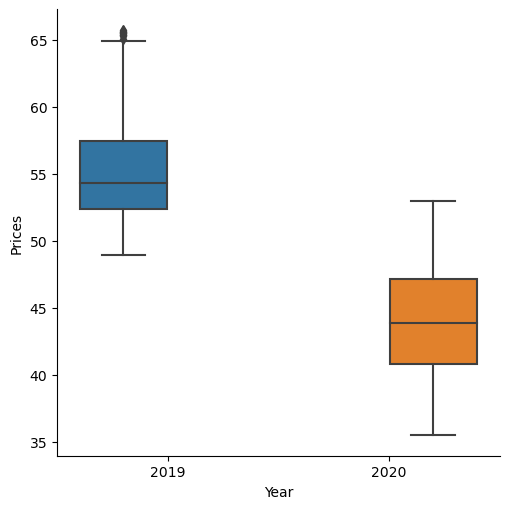

In [7]:
#--------------------------
# Create box plots
#--------------------------

sns.catplot(data = df, 
        y = "Prices", 
        x = "Year" , 
        kind = "box", 
        hue = "Year")

**Comments of the box plots:**
- The box plot of 2019 suggests that the data is skewed to the right, which means that the mean is higher than the median which may due to the outliers as shown in the box plot.
- The box plot of 2020 suggests that the distribution is symmetric.
- The prices in general is less in 2020, which is may due to Covid 19

In [8]:
#--------------------------
# Check the shape numerically:
## Calculate mean - median
## Calculate Q2 - Q1 and Q3 -Q2 
#--------------------------

# Year 2019
df_2019 = df.query("Year == 2019")

print("2019 calculations:")
print("\n", "The difference between mean  & median Q2 is:")
print(df_2019["Prices"].mean() - df_2019["Prices"].median())
print("\n", "The difference between Q2 & Q1 is:")
print(df_2019["Prices"].quantile(0.50) - df_2019["Prices"].quantile(0.25))
print("\n", "The difference between Q3 & Q2 is:")
print(df_2019["Prices"].quantile(0.75) - df_2019["Prices"].quantile(0.50))

print("\n\n\n")

# Year 2020
df_2020 = df.query("Year == 2020")

print("2020 calculations:")
print("\n", "The difference between mean  & median Q2 is:")
print(df_2020["Prices"].mean() - df_2020["Prices"].median())
print("\n", "The difference between Q2 & Q1 is:")
print(df_2020["Prices"].quantile(0.50) - df_2020["Prices"].quantile(0.25))
print("\n", "The difference between Q3 & Q2 is:")
print(df_2020["Prices"].quantile(0.75) - df_2020["Prices"].quantile(0.50))

2019 calculations:

 The difference between mean  & median Q2 is:
1.1447000000000003

 The difference between Q2 & Q1 is:
1.9375

 The difference between Q3 & Q2 is:
3.1199999999999974




2020 calculations:

 The difference between mean  & median Q2 is:
0.51013636363637

 The difference between Q2 & Q1 is:
3.0549999999999997

 The difference between Q3 & Q2 is:
3.230000000000004


<AxesSubplot:xlabel='Prices', ylabel='Count'>

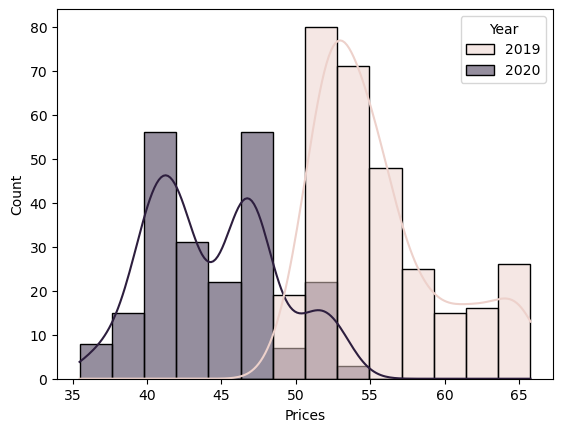

In [9]:
#--------------------------
# Create Histograms
#--------------------------

sns.histplot(data = df,
            x = "Prices",
            hue = "Year",
            kde = True)

For part d, which is: 
<br>
*d.	Use the fitted model to estimate the probability that a randomly selected share price in 2019 is between 40 and 70.*
<br>
We will assume that the distribution of prices in 2019 is normal

In [10]:
#--------------------------
# Part D after assuming its normal
#--------------------------


# Find mean and std of 2019
mean_2019 = df.query("Year == 2019").mean()
std_2019 = df.query("Year == 2019").std()

# Calculate propability of P(x<70) - P(x<40)
import scipy.stats as st

probability = st.norm.cdf(70, loc = mean_2019, scale = std_2019) - st.norm.cdf(40, loc = mean_2019, scale = std_2019)
probability[0]

0.9995203037236343

<AxesSubplot:xlabel='Prices', ylabel='Count'>

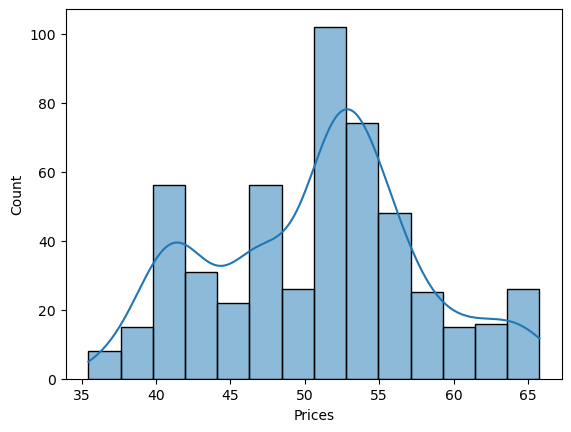

In [11]:
#--------------------------
# Transform the prices of 2019
# Draw a new histogram
#--------------------------

from sklearn.preprocessing import PowerTransformer

Johnson_Transformation =  PowerTransformer()
Transformed_2019 = Johnson_Transformation.fit_transform(df.query("Year == 2019"))


sns.histplot(data = df,
            x = "Prices",
            kde = True)

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.99it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000917,1782.987503,-8015.868703,inf,0.336545,4.104555e-61
burr,0.001155,1742.161001,-7870.929897,inf,0.354239,7.344863e-68
beta,0.001188,1577.710686,-7853.705248,inf,0.500000,3.138914e-139
norm,0.001275,1599.210892,-7824.052965,inf,0.341344,6.629979e-63
gamma,0.001275,1601.202120,-7817.655477,inf,0.341329,6.712783e-63


The best is:  {'lognorm': {'s': 3.0400484884417835, 'loc': 48.94720286436669, 'scale': 100.03189678340514}}


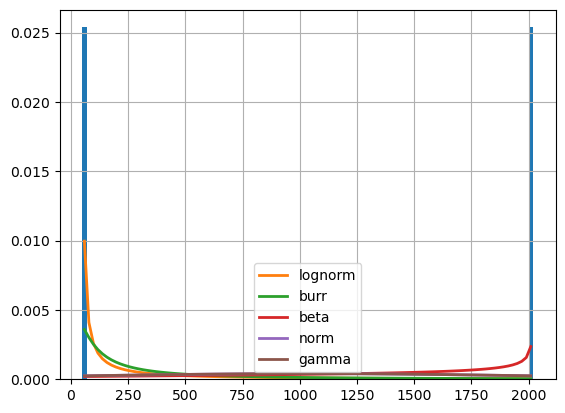

In [12]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df.query("Year == 2019"),
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
display(f.summary())
print("The best is: ", f.get_best(method = 'sumsquare_error'))

# Question2: Distance dataset

The data for this question are contained in the file distance.txt, available on Blackboard. The data consist of the distance, in miles, 100 randomly selected KFUPM staff commute to work each day.

a.	Draw a histogram of the data.
<br><br>
b.	Fit any distribution to the data that provides an adequate fit(You may consider fitting more than one distribution for comparison purposes. (Assume Gamma) even though it is wellburn since we do not know how to use gamma function)
<br><br>
c.	Superimpose the fitted PDF on top of the histogram. Briefly describe how the fitted model match with the histogram.
<br><br>
d.	According to the Kolmogorov Smirnov test, do you think that the fitted distribution provided an adequate fit.
<br><br>
e.	Construct a 95% confidence interval for the mean distance in miles KFUPM staff travel each day to work. 


In [13]:
#--------------------------
# import dataset
#--------------------------

df = pd.read_csv("distance.txt", sep = "\\t", names = ["Distance"])
df

C:\Users\AmmarYasser\AppData\Local\Temp\ipykernel_15292\1504455356.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("distance.txt", sep = "\\t", names = ["Distance"])


,Distance
0,0.8
1,0.8
2,1.3
3,1.5
4,1.8
...,...
95,23.0
96,27.0
97,31.6
98,33.1


In [14]:
#--------------------------
# Show the summary Descriptive statstics 
#--------------------------
round(df.describe(),3)

,Distance
count,100.000
mean,9.877
std,7.237
min,0.800
25%,4.675
50%,8.100
75%,13.025
max,38.500


In [15]:
#--------------------------
# Check the shape numerically:
## Calculate mean - median
## Calculate Q2 - Q1 and Q3 -Q2 
#--------------------------

print("\n", "The difference between mean  & median Q2 is:")
print(df.mean() - df.median())
print("\n", "The difference between Q2 & Q1 is:")
print(df.quantile(0.50) - df.quantile(0.25))
print("\n", "The difference between Q3 & Q2 is:")
print(df.quantile(0.75) - df.quantile(0.50))




 The difference between mean  & median Q2 is:
Distance    1.777
dtype: float64

 The difference between Q2 & Q1 is:
Distance    3.425
dtype: float64

 The difference between Q3 & Q2 is:
Distance    4.925
dtype: float64


**Comments**
<br>
Since the mean is greater than the median
<br>
AND
The differnece between the 3rd quartile and the median is larger than the the difference between the  median and the 1st quartile
<br>
These suggest that the distance is skewed to the right

<AxesSubplot:ylabel='Count'>

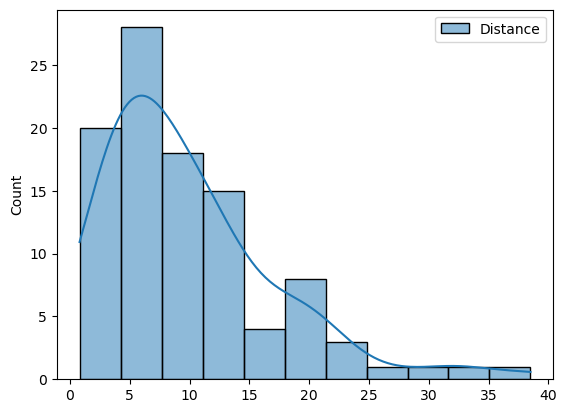

In [16]:
sns.histplot(data = df,
            kde=True)

<AxesSubplot:ylabel='Count'>

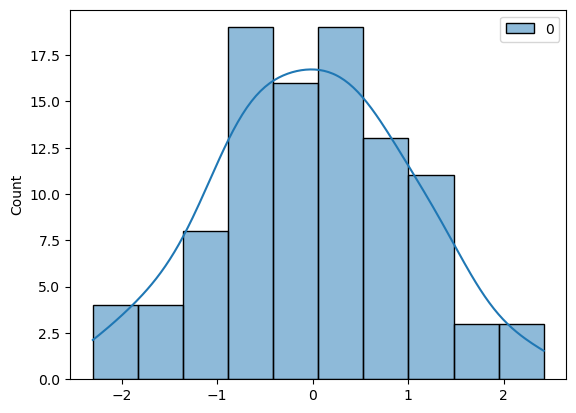

In [17]:
#--------------------------
# Transform the distances
# Draw a new histogram
#--------------------------

from sklearn.preprocessing import PowerTransformer

Johnson_Transformation =  PowerTransformer(method='yeo-johnson')
reshaped = df["Distance"].array.reshape(-1, 1)
Transformed_Distance = Johnson_Transformation.fit_transform(reshaped)


sns.histplot(data = Transformed_Distance,
            kde = True, bins=10)

In [18]:
# Calculate mean and sd
mean_T = Transformed_Distance.mean()
sd_T = Transformed_Distance.std() 
print("Mean is:",round(mean_T, 5))
print("STD is",round(sd_T, 5))

Mean is: 0.0
STD is 1.0


,Distance,Transformed_Dist
0,0.8,-2.302449
1,0.8,-2.302449
2,1.3,-1.973495
3,1.5,-1.859945
4,1.8,-1.704250
...,...,...
95,23.0,1.566138
96,27.0,1.825813
97,31.6,2.085576
98,33.1,2.163078


<AxesSubplot:ylabel='Count'>

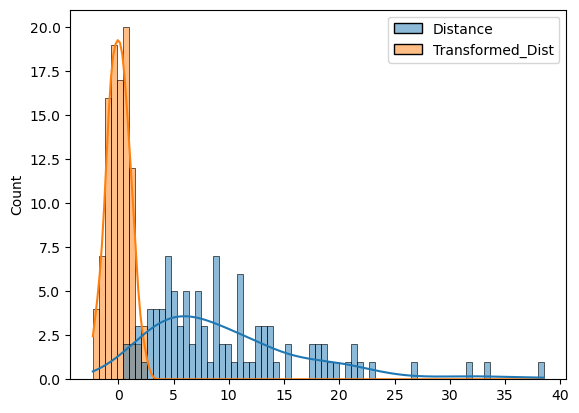

In [19]:
#--------------------------
# Before & After transformation in one plot
#--------------------------

# Add the transformed into the data set
df.insert(loc=1, value = Transformed_Distance, column = "Transformed_Dist")
display(df)
sns.histplot(data=df,bins=75, kde= True,  )


In [29]:
round(df.describe(),3).iloc[:,[1]]

,Transformed_Dist
count,100.000
mean,0.000
std,1.005
min,-2.302
25%,-0.697
50%,0.012
75%,0.689
max,2.419


In [21]:
from fitter import Fitter
import pandas as pd
import numpy as np



f = Fitter(df["Distance"],
           distributions= None)
f.fit()
best_fit_name = f.get_best(method='sumsquare_error')
best_fit_name

Fitting 110 distributions:  32%|███████████████▉                                  | 35/110 [00:05<00:19,  3.83it/s]C:\Users\AmmarYasser\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3485: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 110 distributions:  96%|███████████████████████████████████████████████▏ | 106/110 [00:33<00:05,  1.35s/it]C:\Users\AmmarYasser\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, disc

{'laplace_asymmetric': {'kappa': 0.4751931435201977,
  'loc': 4.1999998069861135,
  'scale': 3.4844333887047387}}